In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
beis_2013 = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/run/beis_case_study/data/reference_run/2013_projection_1.csv')
beis_2013

,fuel_type,2013,2014,2015,2016,2017,2018
0,Coal,141.910063,129.498620,106.438559,59.721642,49.302771,46.541663
1,Coal and gas CCS,0.000000,0.000000,0.000000,0.000000,0.000000,4.704962
2,Oil,2.743753,2.849605,2.834165,2.840292,2.847358,2.839684
3,Gas,87.750011,89.482223,99.666714,131.734002,128.029583,117.497721
4,Nuclear,58.337824,58.337824,56.286179,56.286179,56.286179,56.286179
5,Renewables,30.594590,31.304995,34.156731,45.546462,54.839538,60.464802


In [3]:
beis_2013_long = pd.melt(beis_2013, id_vars='fuel_type')
beis_2013_long.loc[:,'variable'] = beis_2013_long.variable.astype(np.float)

beis_2013_long.head()


,fuel_type,variable,value
0,Coal,2013.0,141.910063
1,Coal and gas CCS,2013.0,0.000000
2,Oil,2013.0,2.743753
3,Gas,2013.0,87.750011
4,Nuclear,2013.0,58.337824


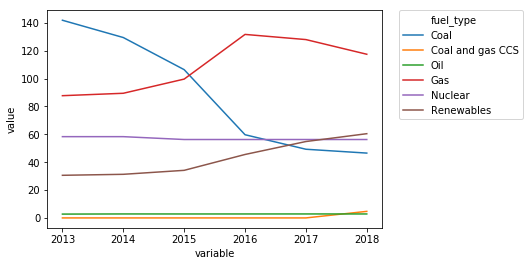

In [4]:
sns.lineplot(data=beis_2013_long, x='variable', y='value', hue='fuel_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [5]:
elecsim_run = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/run/beis_case_study/data/reference_run/elecsim_projections.csv')
elecsim_run = elecsim_run[['year','type','run_id','value_perc','Technology','value']]

elecsim_run['type']=elecsim_run['type'].str.replace("Predicted","ElecSim")
elecsim_run = elecsim_run.dropna()

elecsim_run

,year,type,run_id,value_perc,Technology,value
0,2013.0,Actual,-1.0,43.311625,Coal,14355.798134
1,2013.0,Actual,-1.0,22.707588,Nuclear,7526.513864
2,2013.0,Actual,-1.0,27.563219,CCGT,9135.930888
3,2013.0,Actual,-1.0,6.417568,Wind,2127.126709
4,2013.0,Actual,-1.0,0.000000,Solar,0.000000
5,2013.0,ElecSim,0.0,28.278381,CCGT,7240.490877
6,2013.0,ElecSim,0.0,41.627760,Coal,10658.510366
7,2013.0,ElecSim,0.0,0.000000,Solar,0.000000
8,2013.0,ElecSim,0.0,25.358438,Nuclear,6492.859019
11,2013.0,ElecSim,0.0,4.565602,Wind,1168.992065


In [6]:
elecsim_run_wide = pd.pivot_table(elecsim_run.drop('value', axis=1), index=['year','type','run_id'], columns='Technology')
elecsim_run_wide.columns= elecsim_run_wide.columns.droplevel(0)
elecsim_run_wide = elecsim_run_wide.reset_index()
elecsim_run_wide['Renewables'] = elecsim_run_wide.Wind + elecsim_run_wide.Solar
elecsim_run_wide = elecsim_run_wide.drop(['Solar', 'Wind'], axis=1)
elecsim_renewables_long = pd.melt(elecsim_run_wide, id_vars=['year','type','run_id'])
elecsim_renewables_long = elecsim_renewables_long.rename(columns={'value': 'value_perc'})
elecsim_renewables_long.head()



,year,type,run_id,Technology,value_perc
0,2013.0,Actual,-1.0,CCGT,27.563219
1,2013.0,ElecSim,0.0,CCGT,28.278381
2,2013.0,ElecSim,1.0,CCGT,28.441960
3,2013.0,ElecSim,2.0,CCGT,27.201332
4,2013.0,ElecSim,3.0,CCGT,27.038093


In [7]:
def get_value_perc(df):
    df['value_perc'] = 100*df.value/df.value.sum()
    return df

beis_2013_long = beis_2013_long.rename(columns={"fuel_type":"Technology",'variable':'year'})
beis_2013_long  = beis_2013_long.groupby('year').apply(get_value_perc)
beis_2013_long['type'] = "BEIS"
beis_2013_long['run_id'] = -2
# beis_2013_long = beis_2013_long.drop("value", axis=1)
beis_2013_long.to_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/notebooks/validation-optimisation/data/results/beis_forecasts.csv')
beis_2013_long


,Technology,year,value,value_perc,type,run_id
0,Coal,2013.0,141.910063,44.162483,BEIS,-2
1,Coal and gas CCS,2013.0,0.000000,0.000000,BEIS,-2
2,Oil,2013.0,2.743753,0.853857,BEIS,-2
3,Gas,2013.0,87.750011,27.307848,BEIS,-2
4,Nuclear,2013.0,58.337824,18.154760,BEIS,-2
5,Renewables,2013.0,30.594590,9.521052,BEIS,-2
6,Coal,2014.0,129.498620,41.576159,BEIS,-2
7,Coal and gas CCS,2014.0,0.000000,0.000000,BEIS,-2
8,Oil,2014.0,2.849605,0.914879,BEIS,-2
9,Gas,2014.0,89.482223,28.728701,BEIS,-2


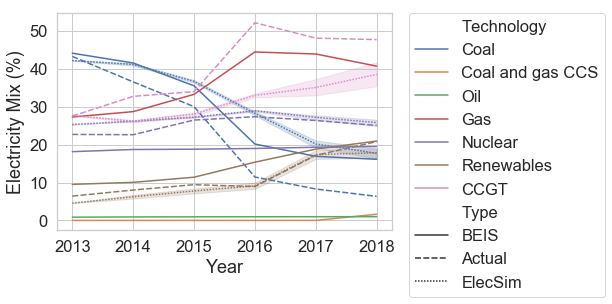

In [37]:
all_projections = beis_2013_long.append(elecsim_renewables_long)
all_projections = all_projections.rename(columns = {"type":'Type'})
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
g = sns.lineplot(data=all_projections, x='year', y='value_perc', style='Type', hue='Technology')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g.set(xlabel='Year', ylabel='Electricity Mix (%)')
plt.savefig('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/notebooks/validation-optimisation/figures/results/throughout_years_beis_elecsim_comparison.pdf',dpi=500, bbox_extra_artists=(lgd,), bbox_inches='tight')


In [9]:
best_mix_year = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/run/beis_case_study/data/reference_run/elecsim_projections_total')
contributed_results = best_mix_year.filter(regex='contributed_')

contributed_results['year'] = best_mix_year['year']
contributed_results['run_id'] = best_mix_year['run_id']

contributed_results = contributed_results.rename(columns={'contributed_PV': "contributed_solar"})
# contributed_results
cluster_size = pd.Series([22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0])

contributed_results['contributed_Wind'] = contributed_results['contributed_Offshore'] +  contributed_results['contributed_Onshore']
contributed_results = contributed_results.drop(['contributed_Offshore', 'contributed_Onshore'], axis=1)
contributed_results

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,contributed_CCGT,contributed_Coal,contributed_solar,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,year,run_id,contributed_Wind
0,266003.28,294156.50,0.000000,163428.881549,1955.52,0,0,0,25065.358424
1,148954.32,296479.10,0.000000,163428.881549,0.00,0,0,0,25160.696785
2,267669.36,290201.76,0.000000,163428.881549,1955.52,0,0,0,23998.428168
3,296054.64,296054.08,0.000000,163428.881549,3259.20,0,0,0,25085.793678
4,121624.56,171715.19,0.000000,150520.394080,0.00,0,0,0,25016.756642
5,278110.80,309958.08,0.000000,163428.881549,3041.92,0,0,0,25160.696785
6,72714.96,227057.06,0.000000,142697.314049,0.00,0,0,0,29770.232393
7,112979.52,232963.10,0.000000,153559.549735,0.00,0,0,0,34811.535988
8,201065.04,283245.52,0.000000,163428.881549,1226.08,0,1,0,65137.917720
9,120926.88,250808.21,0.000000,163428.881549,0.00,0,1,0,65515.644615


In [10]:
def get_weighted_average(df):
#     print(df)
    year = df['year']
    run_id = df['run_id']
    df.apply(lambda x: x*cluster_size.values)
    df['run_id'] = run_id
    df['year'] = year
    return df
    #     return df.apply(lambda x: np.average(x, weights=cluster_size.values))

results_wa = contributed_results.groupby(['run_id','year']).apply(lambda x: get_weighted_average(x)).reset_index(drop=True)

results_wa

,contributed_CCGT,contributed_Coal,contributed_solar,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,year,run_id,contributed_Wind
0,266003.28,294156.50,0.000000,163428.881549,1955.52,0,0,0,25065.358424
1,148954.32,296479.10,0.000000,163428.881549,0.00,0,0,0,25160.696785
2,267669.36,290201.76,0.000000,163428.881549,1955.52,0,0,0,23998.428168
3,296054.64,296054.08,0.000000,163428.881549,3259.20,0,0,0,25085.793678
4,121624.56,171715.19,0.000000,150520.394080,0.00,0,0,0,25016.756642
5,278110.80,309958.08,0.000000,163428.881549,3041.92,0,0,0,25160.696785
6,72714.96,227057.06,0.000000,142697.314049,0.00,0,0,0,29770.232393
7,112979.52,232963.10,0.000000,153559.549735,0.00,0,0,0,34811.535988
8,201065.04,283245.52,0.000000,163428.881549,1226.08,0,1,0,65137.917720
9,120926.88,250808.21,0.000000,163428.881549,0.00,0,1,0,65515.644615


In [11]:
def sum_years(df):
    year = df['year'].iloc[0]
    run_id = df['run_id'].iloc[0]
    sum_df = df.sum()
    sum_df.year=year
    sum_df.run_id=run_id
    return sum_df
    

elecsim_summed = results_wa.groupby(["year",'run_id']).apply(sum_years)
elecsim_summed

contributed_CCGT  contributed_Coal  contributed_solar  \
year run_id                                                          
0    0             1564111.44        2118584.87           0.000000   
     1             1560672.00        2137416.10           0.000000   
     2             1505812.32        2166440.70           0.000000   
     3             1486481.04        2174065.78           0.000000   
     4             1532460.96        2147703.48           0.000000   
     5             1536582.96        2141165.44           0.000000   
     6             1531740.96        2161944.02           0.000000   
     7             1522641.60        2159807.86           0.000000   
     8             1502758.80        2178013.41           0.000000   
     9             1532363.76        2166022.00           0.000000   
     10            1589187.60        2099510.32           0.000000   
     11            1529337.60        2146561.93           0.000000   
     12            1553754.24        2117242.66           0.000000   
     13            1517963.76        2157757.02           0.000000   
     14            1521988.56        2148096.90           0.000000   
     15            1526508.00        2161093.98           0.000000   
     16            1533892.32        2147108.61           0.000000   
     17            1493800.56        2159998.25           0.000000   
     18            1510814.16        2163448.97           0.000000   
     19            1518745.68        2169820.32           0.000000   
     20            1503198.72        2163729.42           0.000000   
     21            1514056.32        2172166.62           0.000000   
     22            1539262.08        2149588.42           0.000000   
     23            1510186.32        2161680.16           0.000000   
     24            1570561.20        2117343.78           0.000000   
     25            1527572.88        2158181.25           0.000000   
     26            1498365.36        2168954.48           0.000000   
     27            1535560.56        2161573.51           0.000000   
     28            1497193.20        2157829.70           0.000000   
     29            1498117.68        2187374.12           0.000000   
...                       ...               ...                ...   
5    66            6036352.56         544588.08       60968.892456   
     67            1573463.04        1027527.58      180280.826200   
     68            1790830.13         573479.96       22221.008640   
     69            2146116.48         587605.95      265803.820808   
     70            1245252.99         935096.15       34581.444696   
     71            1235232.77         905936.91       36525.782952   
     72            1310773.44        1221627.12       68885.126784   
     73            1726608.48         701939.82       16110.231264   
     74            1939302.90         549381.74      187098.644208   
     75            1347982.16         803603.85       40831.103376   
     76            1325333.52         925454.19       37359.070776   
     77            1503922.06         579812.69       23054.296464   
     78            6945482.59         364483.88       38331.239904   
     79            1234758.64         766910.67       34164.800784   
     80            1205130.96        1062947.81      199225.446304   
     81            2566522.50         486229.20      296689.278304   
     82            1610239.94         835438.43       42219.916416   
     83            1250388.65         946335.47       55552.521600   
     84            3149815.77        1015755.31       61385.536368   
     85            1520728.56         913377.16      214038.466616   
     86            1342291.91         845516.26       57774.622464   
     87            1214566.56        1016399.78       32637.106440   
     88            5375451.82         540238.27       30276.124272   
     89            1066615.68         968658.99       59302.316808   
     90            1266

In [12]:

hist_long = pd.melt(elecsim_summed, id_vars=["run_id", "year"])
hist_long

,run_id,year,variable,value
0,0.0,0.0,contributed_CCGT,1.564111e+06
1,1.0,0.0,contributed_CCGT,1.560672e+06
2,2.0,0.0,contributed_CCGT,1.505812e+06
3,3.0,0.0,contributed_CCGT,1.486481e+06
4,4.0,0.0,contributed_CCGT,1.532461e+06
5,5.0,0.0,contributed_CCGT,1.536583e+06
6,6.0,0.0,contributed_CCGT,1.531741e+06
7,7.0,0.0,contributed_CCGT,1.522642e+06
8,8.0,0.0,contributed_CCGT,1.502759e+06
9,9.0,0.0,contributed_CCGT,1.532364e+06


In [13]:
hist_long['variable'] = hist_long.variable.str.split("_").str[-1].str.lower()
hist_long['year'] = hist_long['year'] + 2013
hist_long

,run_id,year,variable,value
0,0.0,2013.0,ccgt,1.564111e+06
1,1.0,2013.0,ccgt,1.560672e+06
2,2.0,2013.0,ccgt,1.505812e+06
3,3.0,2013.0,ccgt,1.486481e+06
4,4.0,2013.0,ccgt,1.532461e+06
5,5.0,2013.0,ccgt,1.536583e+06
6,6.0,2013.0,ccgt,1.531741e+06
7,7.0,2013.0,ccgt,1.522642e+06
8,8.0,2013.0,ccgt,1.502759e+06
9,9.0,2013.0,ccgt,1.532364e+06


In [14]:
def get_mix(df):
    print(df)
    df['value_perc'] = df['value']/sum(df['value'])*100
    return df

hist_long_perc = hist_long.groupby(['year','run_id']).apply(lambda x: get_mix(x))
hist_long_perc = hist_long_perc.rename(columns={"type":"Type", "variable":'Technology'})
hist_long_perc['Technology'] = hist_long_perc['Technology'].map({'coal': "Coal", 'ccgt': "CCGT", 'nuclear':"Nuclear", "wind":"Wind","solar":"Solar"})
hist_long_perc

      run_id    year variable         value
0        0.0  2013.0     ccgt  1.564111e+06
576      0.0  2013.0     coal  2.118585e+06
1152     0.0  2013.0    solar  0.000000e+00
1728     0.0  2013.0  nuclear  1.263922e+06
2304     0.0  2013.0      gas  1.021216e+04
2880     0.0  2013.0  biomass  0.000000e+00
3456     0.0  2013.0     wind  2.140695e+05
      run_id    year variable         value
0        0.0  2013.0     ccgt  1.564111e+06
576      0.0  2013.0     coal  2.118585e+06
1152     0.0  2013.0    solar  0.000000e+00
1728     0.0  2013.0  nuclear  1.263922e+06
2304     0.0  2013.0      gas  1.021216e+04
2880     0.0  2013.0  biomass  0.000000e+00
3456     0.0  2013.0     wind  2.140695e+05
      run_id    year variable         value
1        1.0  2013.0     ccgt  1.560672e+06
577      1.0  2013.0     coal  2.137416e+06
1153     1.0  2013.0    solar  0.000000e+00
1729     1.0  2013.0  nuclear  1.262709e+06
2305     1.0  2013.0      gas  9.668960e+03
2881     1.0  2013.0  biomass  0

3517    61.0  2013.0     wind  2.140695e+05
      run_id    year variable         value
62      62.0  2013.0     ccgt  1.496045e+06
638     62.0  2013.0     coal  2.182390e+06
1214    62.0  2013.0    solar  0.000000e+00
1790    62.0  2013.0  nuclear  1.262316e+06
2366    62.0  2013.0      gas  1.075536e+04
2942    62.0  2013.0  biomass  0.000000e+00
3518    62.0  2013.0     wind  2.140649e+05
      run_id    year variable         value
63      63.0  2013.0     ccgt  1.549637e+06
639     63.0  2013.0     coal  2.154385e+06
1215    63.0  2013.0    solar  0.000000e+00
1791    63.0  2013.0  nuclear  1.245965e+06
2367    63.0  2013.0      gas  9.668960e+03
2943    63.0  2013.0  biomass  0.000000e+00
3519    63.0  2013.0     wind  2.138093e+05
      run_id    year variable         value
64      64.0  2013.0     ccgt  1.502467e+06
640     64.0  2013.0     coal  2.190692e+06
1216    64.0  2013.0    solar  0.000000e+00
1792    64.0  2013.0  nuclear  1.243668e+06
2368    64.0  2013.0      gas  1

      run_id    year variable         value
122     26.0  2014.0     ccgt  1.473420e+06
698     26.0  2014.0     coal  1.918181e+06
1274    26.0  2014.0    solar  0.000000e+00
1850    26.0  2014.0  nuclear  1.251867e+06
2426    26.0  2014.0      gas  8.462280e+03
3002    26.0  2014.0  biomass  0.000000e+00
3578    26.0  2014.0     wind  2.588962e+05
      run_id    year variable         value
123     27.0  2014.0     ccgt  1.354882e+06
699     27.0  2014.0     coal  2.073833e+06
1275    27.0  2014.0    solar  0.000000e+00
1851    27.0  2014.0  nuclear  1.259176e+06
2427    27.0  2014.0      gas  8.442880e+03
3003    27.0  2014.0  biomass  0.000000e+00
3579    27.0  2014.0     wind  2.163858e+05
      run_id    year variable         value
124     28.0  2014.0     ccgt  1.159903e+06
700     28.0  2014.0     coal  1.982488e+06
1276    28.0  2014.0    solar  0.000000e+00
1852    28.0  2014.0  nuclear  1.211352e+06
2428    28.0  2014.0      gas  6.673600e+03
3004    28.0  2014.0  biomass  0

3623    71.0  2014.0     wind  2.131748e+05
      run_id    year variable         value
168     72.0  2014.0     ccgt  1.422500e+06
744     72.0  2014.0     coal  1.995311e+06
1320    72.0  2014.0    solar  0.000000e+00
1896    72.0  2014.0  nuclear  1.258293e+06
2472    72.0  2014.0      gas  8.572860e+03
3048    72.0  2014.0  biomass  0.000000e+00
3624    72.0  2014.0     wind  2.232575e+05
      run_id    year variable         value
169     73.0  2014.0     ccgt  1.387114e+06
745     73.0  2014.0     coal  2.025405e+06
1321    73.0  2014.0    solar  0.000000e+00
1897    73.0  2014.0  nuclear  1.257644e+06
2473    73.0  2014.0      gas  8.532120e+03
3049    73.0  2014.0  biomass  0.000000e+00
3625    73.0  2014.0     wind  2.324190e+05
      run_id    year variable         value
170     74.0  2014.0     ccgt  1.219570e+06
746     74.0  2014.0     coal  2.063933e+06
1322    74.0  2014.0    solar  0.000000e+00
1898    74.0  2014.0  nuclear  1.232502e+06
2474    74.0  2014.0      gas  7

3681    33.0  2015.0     wind  3.979071e+05
      run_id    year variable         value
226     34.0  2015.0     ccgt  1.405593e+06
802     34.0  2015.0     coal  1.616123e+06
1378    34.0  2015.0    solar  0.000000e+00
1954    34.0  2015.0  nuclear  1.228385e+06
2530    34.0  2015.0      gas  7.185760e+03
3106    34.0  2015.0  biomass  0.000000e+00
3682    34.0  2015.0     wind  3.979092e+05
      run_id    year variable         value
227     35.0  2015.0     ccgt  1.310765e+06
803     35.0  2015.0     coal  1.789459e+06
1379    35.0  2015.0    solar  0.000000e+00
1955    35.0  2015.0  nuclear  1.235038e+06
2531    35.0  2015.0      gas  7.779400e+03
3107    35.0  2015.0  biomass  0.000000e+00
3683    35.0  2015.0     wind  3.368779e+05
      run_id    year variable         value
228     36.0  2015.0     ccgt  1.562610e+06
804     36.0  2015.0     coal  1.589564e+06
1380    36.0  2015.0    solar  0.000000e+00
1956    36.0  2015.0  nuclear  1.254001e+06
2532    36.0  2015.0      gas  1

      run_id    year variable         value
276     84.0  2015.0     ccgt  1.368712e+06
852     84.0  2015.0     coal  1.677038e+06
1428    84.0  2015.0    solar  0.000000e+00
2004    84.0  2015.0  nuclear  1.230641e+06
2580    84.0  2015.0      gas  7.608680e+03
3156    84.0  2015.0  biomass  0.000000e+00
3732    84.0  2015.0     wind  3.702198e+05
      run_id    year variable         value
277     85.0  2015.0     ccgt  1.430076e+06
853     85.0  2015.0     coal  1.770853e+06
1429    85.0  2015.0    solar  0.000000e+00
2005    85.0  2015.0  nuclear  1.254001e+06
2581    85.0  2015.0      gas  1.002204e+04
3157    85.0  2015.0  biomass  0.000000e+00
3733    85.0  2015.0     wind  2.130213e+05
      run_id    year variable         value
278     86.0  2015.0     ccgt  1.593573e+06
854     86.0  2015.0     coal  1.559801e+06
1430    86.0  2015.0    solar  0.000000e+00
2006    86.0  2015.0  nuclear  1.251377e+06
2582    86.0  2015.0      gas  9.527340e+03
3158    86.0  2015.0  biomass  0

3784    40.0  2016.0     wind  2.284552e+05
      run_id    year variable         value
329     41.0  2016.0     ccgt  1.211052e+06
905     41.0  2016.0     coal  1.364948e+06
1481    41.0  2016.0    solar  0.000000e+00
2057    41.0  2016.0  nuclear  1.200189e+06
2633    41.0  2016.0      gas  2.016048e+04
3209    41.0  2016.0  biomass  0.000000e+00
3785    41.0  2016.0     wind  6.002443e+05
      run_id    year variable         value
330     42.0  2016.0     ccgt  1.344036e+06
906     42.0  2016.0     coal  1.352669e+06
1482    42.0  2016.0    solar  0.000000e+00
2058    42.0  2016.0  nuclear  1.219688e+06
2634    42.0  2016.0      gas  2.564874e+04
3210    42.0  2016.0  biomass  0.000000e+00
3786    42.0  2016.0     wind  4.423378e+05
      run_id    year variable         value
331     43.0  2016.0     ccgt  1.534674e+06
907     43.0  2016.0     coal  1.301859e+06
1483    43.0  2016.0    solar  0.000000e+00
2059    43.0  2016.0  nuclear  1.247457e+06
2635    43.0  2016.0      gas  3

      run_id    year variable         value
390      6.0  2017.0     ccgt  1.956414e+06
966      6.0  2017.0     coal  7.729115e+05
1542     6.0  2017.0    solar  3.319263e+04
2118     6.0  2017.0  nuclear  1.221524e+06
2694     6.0  2017.0      gas  1.125200e+03
3270     6.0  2017.0  biomass  0.000000e+00
3846     6.0  2017.0     wind  3.424744e+05
      run_id    year variable         value
391      7.0  2017.0     ccgt  1.454428e+06
967      7.0  2017.0     coal  7.262590e+05
1543     7.0  2017.0    solar  5.541364e+04
2119     7.0  2017.0  nuclear  1.164005e+06
2695     7.0  2017.0      gas  2.182500e+03
3271     7.0  2017.0  biomass  0.000000e+00
3847     7.0  2017.0     wind  8.619681e+05
      run_id    year variable         value
392      8.0  2017.0     ccgt  1.452865e+06
968      8.0  2017.0     coal  8.782556e+05
1544     8.0  2017.0    solar  4.791405e+04
2120     8.0  2017.0  nuclear  1.185078e+06
2696     8.0  2017.0      gas  5.610480e+03
3272     8.0  2017.0  biomass  0

      run_id    year variable         value
440     56.0  2017.0     ccgt  1.466351e+06
1016    56.0  2017.0     coal  9.755096e+05
1592    56.0  2017.0    solar  2.138974e+05
2168    56.0  2017.0  nuclear  1.200882e+06
2744    56.0  2017.0      gas  1.162060e+04
3320    56.0  2017.0  biomass  0.000000e+00
3896    56.0  2017.0     wind  3.280100e+05
      run_id    year variable         value
441     57.0  2017.0     ccgt  1.421403e+06
1017    57.0  2017.0     coal  1.007615e+06
1593    57.0  2017.0    solar  1.959233e+05
2169    57.0  2017.0  nuclear  1.197762e+06
2745    57.0  2017.0      gas  7.628080e+03
3321    57.0  2017.0  biomass  0.000000e+00
3897    57.0  2017.0     wind  3.511118e+05
      run_id    year variable         value
442     58.0  2017.0     ccgt  1.052779e+06
1018    58.0  2017.0     coal  9.627655e+05
1594    58.0  2017.0    solar  4.513642e+04
2170    58.0  2017.0  nuclear  1.145160e+06
2746    58.0  2017.0      gas  4.985800e+03
3322    58.0  2017.0  biomass  0

3959    23.0  2018.0     wind  7.542955e+05
      run_id    year variable         value
504     24.0  2018.0     ccgt  1.460983e+06
1080    24.0  2018.0     coal  8.851650e+05
1656    24.0  2018.0    solar  1.451382e+05
2232    24.0  2018.0  nuclear  1.178533e+06
2808    24.0  2018.0      gas  0.000000e+00
3384    24.0  2018.0  biomass  0.000000e+00
3960    24.0  2018.0     wind  5.173156e+05
      run_id    year variable         value
505     25.0  2018.0     ccgt  1.019564e+06
1081    25.0  2018.0     coal  1.135140e+06
1657    25.0  2018.0    solar  5.777462e+04
2233    25.0  2018.0  nuclear  1.174254e+06
2809    25.0  2018.0      gas  0.000000e+00
3385    25.0  2018.0  biomass  0.000000e+00
3961    25.0  2018.0     wind  6.625891e+05
      run_id    year variable         value
506     26.0  2018.0     ccgt  2.094351e+06
1082    26.0  2018.0     coal  6.138666e+05
1658    26.0  2018.0    solar  1.923807e+05
2234    26.0  2018.0  nuclear  1.185168e+06
2810    26.0  2018.0      gas  0

4012    76.0  2018.0     wind  6.840720e+05
      run_id    year variable         value
557     77.0  2018.0     ccgt  1.503922e+06
1133    77.0  2018.0     coal  5.798127e+05
1709    77.0  2018.0    solar  2.305430e+04
2285    77.0  2018.0  nuclear  1.150779e+06
2861    77.0  2018.0      gas  0.000000e+00
3437    77.0  2018.0  biomass  0.000000e+00
4013    77.0  2018.0     wind  9.469581e+05
      run_id    year variable         value
558     78.0  2018.0     ccgt  6.945483e+06
1134    78.0  2018.0     coal  3.644839e+05
1710    78.0  2018.0    solar  3.833124e+04
2286    78.0  2018.0  nuclear  1.202224e+06
2862    78.0  2018.0      gas  0.000000e+00
3438    78.0  2018.0  biomass  0.000000e+00
4014    78.0  2018.0     wind  4.551862e+05
      run_id    year variable         value
559     79.0  2018.0     ccgt  1.234759e+06
1135    79.0  2018.0     coal  7.669107e+05
1711    79.0  2018.0    solar  3.416480e+04
2287    79.0  2018.0  nuclear  1.146817e+06
2863    79.0  2018.0      gas  0

,run_id,year,Technology,value,value_perc
0,0.0,2013.0,CCGT,1.564111e+06,30.248343
1,1.0,2013.0,CCGT,1.560672e+06,30.102445
2,2.0,2013.0,CCGT,1.505812e+06,29.190438
3,3.0,2013.0,CCGT,1.486481e+06,28.867616
4,4.0,2013.0,CCGT,1.532461e+06,29.652789
5,5.0,2013.0,CCGT,1.536583e+06,29.750992
6,6.0,2013.0,CCGT,1.531741e+06,29.611931
7,7.0,2013.0,CCGT,1.522642e+06,29.447763
8,8.0,2013.0,CCGT,1.502759e+06,29.072662
9,9.0,2013.0,CCGT,1.532364e+06,29.591326


In [15]:
hist_long_perc = hist_long_perc.dropna()
# hist_long_perc = hist_long_perc.drop('index', axis=1)
hist_long_perc['type']='ElecSim'
hist_long_perc
both = hist_long_perc.append(elecsim_run[elecsim_run.type=="Actual"])
both = both.reset_index(drop=True)
both

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Technology,run_id,type,value,value_perc,year
0,CCGT,0.0,ElecSim,1.564111e+06,30.248343,2013.0
1,CCGT,1.0,ElecSim,1.560672e+06,30.102445,2013.0
2,CCGT,2.0,ElecSim,1.505812e+06,29.190438,2013.0
3,CCGT,3.0,ElecSim,1.486481e+06,28.867616,2013.0
4,CCGT,4.0,ElecSim,1.532461e+06,29.652789,2013.0
5,CCGT,5.0,ElecSim,1.536583e+06,29.750992,2013.0
6,CCGT,6.0,ElecSim,1.531741e+06,29.611931,2013.0
7,CCGT,7.0,ElecSim,1.522642e+06,29.447763,2013.0
8,CCGT,8.0,ElecSim,1.502759e+06,29.072662,2013.0
9,CCGT,9.0,ElecSim,1.532364e+06,29.591326,2013.0


In [16]:
# both.year = both.year.astype(int)

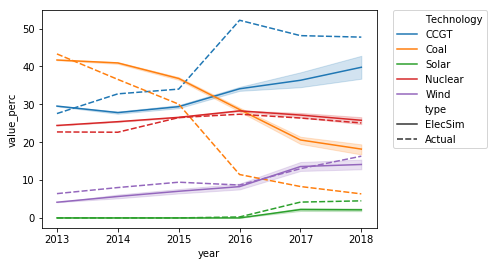

In [24]:
sns.lineplot(data=both, x='year', y='value_perc', hue='Technology', style='type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [18]:
beis_2013_long.loc[:,"value"] = beis_2013_long.loc[:,"value"]*100

In [19]:
beis_2013_long

,Technology,year,value,value_perc,type,run_id
0,Coal,2013.0,14191.006300,44.162483,BEIS,-2
1,Coal and gas CCS,2013.0,0.000000,0.000000,BEIS,-2
2,Oil,2013.0,274.375291,0.853857,BEIS,-2
3,Gas,2013.0,8775.001115,27.307848,BEIS,-2
4,Nuclear,2013.0,5833.782392,18.154760,BEIS,-2
5,Renewables,2013.0,3059.459009,9.521052,BEIS,-2
6,Coal,2014.0,12949.862000,41.576159,BEIS,-2
7,Coal and gas CCS,2014.0,0.000000,0.000000,BEIS,-2
8,Oil,2014.0,284.960471,0.914879,BEIS,-2
9,Gas,2014.0,8948.222322,28.728701,BEIS,-2


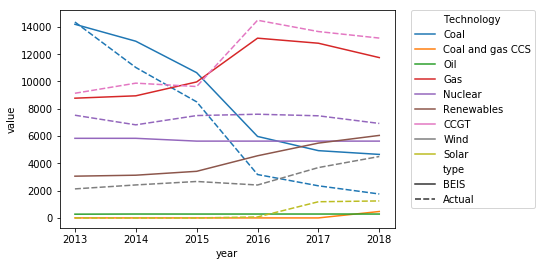

In [20]:
beis_actual = beis_2013_long.append(elecsim_run[elecsim_run.type=="Actual"])
beis_actual
sns.lineplot(data=beis_actual, x='year', y='value', style="type", hue='Technology')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# 2018-2035 Projections

In [21]:
beis_2035 = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/run/beis_case_study/data/reference_run/2018-2035-beis.csv')
beis_2035.head()

,fuel_type,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
0,Coal,8,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Coal and natural gas CCS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
2,Oil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Natural gas,119,106,100,81,73,80,75,77,72,78,76,71,66,58,49,46,41,34
4,Nuclear,57,59,59,59,59,53,36,40,53,56,65,72,64,69,81,81,92,104


In [22]:
beis_2035_long = pd.melt(beis_2035, id_vars='fuel_type')
beis_2035_long.head()

,fuel_type,variable,value
0,Coal,2018,8
1,Coal and natural gas CCS,2018,0
2,Oil,2018,0
3,Natural gas,2018,119
4,Nuclear,2018,57


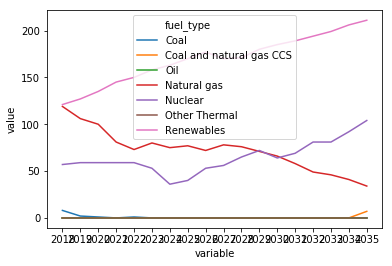

In [23]:
sns.lineplot(data=beis_2035_long, x='variable', y='value', hue='fuel_type')